In [169]:
from IPython.display import Image #IPython a command shell for interactive computing in multiple programming languages
#Here we want to be able to dislpay images
%matplotlib inline
import matplotlib.pyplot as plt #plotting package
from matplotlib.ticker import MaxNLocator 
import numpy as np #arrays package 
import graphviz # the creation and rendering of graph descriptions in the DOT language
#Dot Langauge is graph description language --> Ie be able to draw graphs

from graphviz import Digraph #Digraph means a directed graph. Graph with arrows. 


###Our first use of sklearn.
#Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning.


from sklearn.model_selection import train_test_split
#model_selection is a class or sub/package.


#test_train_split is where we can pass in a dataset and it will automatically devide it into a training + testing sample.
# it outputs  x_train, x_test, y_train data, y_test ==> As arrays. 

from sklearn.tree import DecisionTreeClassifier
#Here we want to use the Tree, specifically the Decision Tree Classifier algorithm

#Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
#Look for parameters of Decision Tree Clasifier

from sklearn.tree import export_graphviz
#Export a decision tree in DOT format.


import math ##FOR SIN + RADIANS


In [170]:
# Here we will have our decision tree learn a line segment

In [171]:
# First, we generate data for a line segment [0.5, 1.5) (y=1) and -->This is where we want the line
# for points outside the line segent [0, 0.5) and [1.5, 2.0] (y=0) -->There are just the rest of the points.

npts = 1000 #number of points

#Fill the arrays with zeros
X1 = np.zeros((npts,1)) #1000 rows, 1 column -->Reshapes it.
#1000 columns.
y0 = np.zeros(npts)
y1 = np.zeros(npts)

#Go through the points 
for i in range(0,npts): 
    X1[i,0] = np.random.uniform(0.0,2.0) #Create random uniform distribution of points between 0 and 2.         
    if ((X1[i,0]<=0.5) or (X1[i,0]>1.5)): #We classify the value as 1 if we fall withing [0.5, 1.5)
        y1[i] = 0 
    else:
        y1[i] = 1


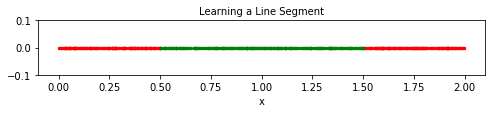

In [172]:
# plot data points
plt.close('all')
plt.figure(figsize=(8, 1))
plt.title('Learning a Line Segment', fontsize='medium')
plt.xlabel('x')
plt.ylabel('')
plt.scatter(x = X1[y1==0, 0], y=y0[y1==0], color='red', label='0', s=5)
plt.scatter(x = X1[y1==1, 0], y=y0[y1==1], color='green', label='1', s=5)
plt.axis(range=1, aspect=1)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,0.1)
plt.show()

In [173]:
# split data into 50% training and 50% test data

X1_train, X1_test, y1_train, y1_test = train_test_split(
         X1, y1, test_size=0.50, random_state=0) 
# We pass in the x and why points which are then selected by sklearn.model_select to be train/vs test.
# Test_size = 0.5 means we want half the data to be tested.
#random_state means the random seed, or how to randomize. 

if (npts==20):
    print(np.sort(X1_train.transpose()))

In [174]:
# Fit for various depth trees

MaxDepth = 4 #We want to go through depths 1, 2, 3, 4
Errors = np.zeros((MaxDepth,2)) #Make a 4 row, 2 column 0 array/

print ('Max Depth, Training, Test') # Here we will record the training + testing error per each depth.

#We iterate through differnt depths of the tree, starting with depth of 1
for i in range(0,MaxDepth):
    
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    #create a decision tree classifier, with the impurity of entropy ( -Sum p(i|t)*log2p(i|t)  )
    #Remember a higher entropy value means that the data is more heterogenous
    #Thus we want a lower entropy value!
    
    tree.fit(X1_train, y1_train)
    #Build a decision tree classifier from the training set (X, y).
    #Have the tree use the test data, and the above information, ie the impurity measure, and depth,
    #to now train it
    
    #COMBINE TRAINING + TEST DATA.
    X1_combined = np.vstack((X1_train, X1_test))
    #Stack arrays in sequence vertically
    #Train
    #Test
    
    y1_combined = np.hstack((y1_train, y1_test))
    #Stack arrays in sequence horizontally. Train -> Test

    # optional outputs
    z = tree.apply(X1_combined)
    #Return the index of the leaf that each sample is predicted as (Ie how is each point classified.)
    print(z)
    
    
    
    dp = tree.decision_path(X1_combined)
    #Return the decision path in the tree.
    
    print (dp)
    
    
    #Here we go through our model after it has been built, again with the training data first
    Errors[i,0] = 1 - tree.score(X1_train,y1_train)
    # Return the mean accuracy on the given train data and labels  per tree (And the maximum depth it went through)
    
    
    #Now we go through our model using the testing data.
    Errors[i,1] = 1 - tree.score(X1_test,y1_test)
    # Return the mean accuracy on the given test data and labels  per tree (And the maximum depth it went through)
    
    print(i+1,Errors[i,0],Errors[i,1])


Max Depth, Training, Test
[2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 1 1 2 1 2 1 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 1
 1 2 1 1 2 2 1 2 2 2 2 2 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 2 1 1 2 2 2 1 2 2 2
 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 1 2 1 2 2 2 2 1 2 1 2 2 2 2 1 2 1 2 2 2 1
 2 2 1 2 2 2 1 1 1 2 1 2 2 2 2 1 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1
 2 1 2 1 2 1 1 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 1 2 2 1 1 1 2 2 2 2 2 2 2 2
 1 2 2 2 2 1 2 2 2 2 1 2 1 1 2 2 2 2 2 2 2 2 2 1 1 2 2 1 2 2 2 2 1 2 1 2 1
 2 2 1 2 1 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 2 2 2 2 2 2 2 2
 2 1 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 1 1 1 2 2 1 2 2 2 1 1 2 2 1 2 1 2 2 2 1
 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 1 2 2 1 2 2 2 2 1 2 2 2 1 2 1 2 2 2 2 2 2 2
 2 2 2 1 2 2 1 1 2 1 2 1 1 2 2 2 2 2 1 2 2 2 2 2 1 2 2 1 2 1 2 2 2 2 2 2 1
 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 1 1 2 2 1 2 2 2 1 2 1 1 2
 2 1 2 2 1 2 2 2 2 2 1 2 2 1 2 1 2 1 2 2 1 2 2 2 1 2 1 2 1 2 2 2 1 2 2 2 2
 2 2 1 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 1 2 2 1 1 1 1 2 1 2 1 2 2 2 1 2 2 2 2

In [175]:
# plot the final decision tree
export_graphviz(tree, out_file='T1.dot', feature_names=['x'])
# with open('T1.dot') as f:
#    dot_graph = f.read()
# graphviz.Source(dot_graph)

In [176]:
#
# If you want to generate a .png file of the image of the tree use the following steps:
# 1) Install GraphViz on your computer
# 2) Open a command prompt
# 3) Go to the directory in which the T1.dot file was stored 
#    when you ran the preceeding cell
#    It will probably be the same directory that this .ipynb file is in
# 4) Run the command:  dot -Tpng T1.dot -o T1.png
# 5) The image will be in the file T1.png
#

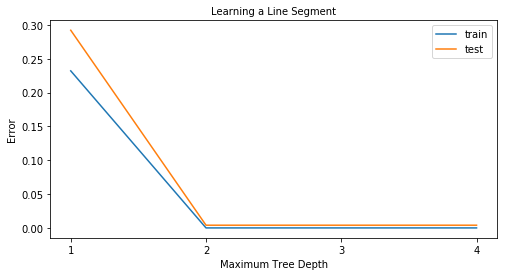

In [177]:
# plot errors by tree depth    
  
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning a Line Segment', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 

#As we saw above, the error went down to almost 0 for the training data after the depth of 1.
#The testing data still got close to, but never to 0.
#This shows us that with one split, we can almost classify our data into tow homogenous classes (Inside the line or outside the line)



#---------- NOTE ----------#
# The part that still confuses me, is where exactly did we input the feautres? When learning about the decision tree,
#splits were made off of features. 
#My assumption that its setting some kind of margin in the value such as (If this number is less than this it's in this class)


# To add a bit more clarification that I got:
# So, here we only have 1 column of the data points between 0 and 2
# And our y values tells us if we are a line segment or not
# The Decision tree, does (or again I highly beleive) look at this one column of x points and say hmm what is making us fall into this one category
# In this case it can be "less than 0.5" or "greater than 0.5 " or "less than 1.5" or "greater than 1.5"
# The four cut of points as to why our error on the first deoth is around 0.25 (Because we can be one of the four option)
# Then on the second depth, we jut make the other decision. 

In [178]:
# learn an axis-aligned rectangle

In [179]:
# generate data for an axis-aligned rectangle with vertex coordinates
# (0.5,0.5),(0.5,1.5),(1.5,0.5),(1.5,1.5)  # Our four features essentially that the tree needs to learn --> The cut off points.
# for points inside the rectangke, y=1 and for points outside the rectangle, y=0.

npts = 10000 #increase the number of points by a magnitude of 10

#Create our zero arrays
X2 = np.zeros((npts,2)) #Why do we have two columns now?
y2 = np.zeros(npts)

#Add in the randomization points. 
for i in range(0,npts): 
    X2[i,0] = np.random.uniform(0.0,2.0) 
    X2[i,1] = np.random.uniform(0.0,2.0) 
    # If our value does not fall in one of the line segments, classify as 0. Otherwise classify as 1.
    if ((X2[i,0]<=0.5) or (X2[i,0]>1.5) or (X2[i,1]<=0.5) or (X2[i,1]>1.5)):
        y2[i] = 0
    else:
        y2[i] = 1
        

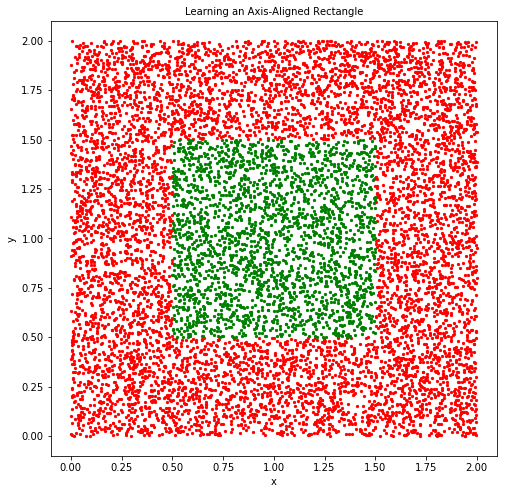

In [180]:
# plot data points
plt.close('all')
plt.figure(figsize=(8, 8))
plt.title('Learning an Axis-Aligned Rectangle', fontsize='medium')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x = X2[y2==0, 0], y = X2[y2==0, 1], color='red', label='0', s=5)
#Show all of the points that were classified as being part of the square.
plt.scatter(x = X2[y2==1, 0], y = X2[y2==1, 1], color='green', label='1', s=5)
plt.axis(range=1, aspect=1)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,2.1)
plt.show()

In [181]:
# split data into 50% training and 50% test data
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(
         X2, y2, test_size=0.50, random_state=0)


In [182]:
# Fit for various depth trees
MaxDepth = 5 #Here we add an extra layer of depth
Errors = np.zeros((MaxDepth,2)) #Create 5 * 2 errors array. 

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    #Create our Decision tree classifer with impurity of entropy and depth of iteration
    
    tree.fit(X2_train, y2_train)
    #Make the tree classifier learn from the training data 

    
    #Combine the training and testing data. 
    X2_combined = np.vstack((X2_train, X2_test))
    y2_combined = np.hstack((y2_train, y2_test))

    # optional outputs
    z = tree.apply(X2_combined)
    #Return the index of the leaf that each sample is predicted as
    print(z)
    
    
    dp = tree.decision_path(X2_combined)
    #Return the decision path the tree took. 
    print (dp)
      
    Errors[i,0] = 1 - tree.score(X2_train, y2_train)
    #Compute the mean accuracy on the given train data and labels  per tree (And the maximum depth it went through)
    
    Errors[i,1] = 1 - tree.score(X2_test,y2_test)
    #Compute the mean accuracy on the given test data and labels  per tree (And the maximum depth it went through)
    
    
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
[2 2 2 ... 1 2 2]
  (0, 0)	1
  (0, 2)	1
  (1, 0)	1
  (1, 2)	1
  (2, 0)	1
  (2, 2)	1
  (3, 0)	1
  (3, 2)	1
  (4, 0)	1
  (4, 2)	1
  (5, 0)	1
  (5, 2)	1
  (6, 0)	1
  (6, 2)	1
  (7, 0)	1
  (7, 1)	1
  (8, 0)	1
  (8, 2)	1
  (9, 0)	1
  (9, 2)	1
  (10, 0)	1
  (10, 1)	1
  (11, 0)	1
  (11, 2)	1
  (12, 0)	1
  :	:
  (9987, 2)	1
  (9988, 0)	1
  (9988, 2)	1
  (9989, 0)	1
  (9989, 2)	1
  (9990, 0)	1
  (9990, 2)	1
  (9991, 0)	1
  (9991, 1)	1
  (9992, 0)	1
  (9992, 2)	1
  (9993, 0)	1
  (9993, 2)	1
  (9994, 0)	1
  (9994, 1)	1
  (9995, 0)	1
  (9995, 1)	1
  (9996, 0)	1
  (9996, 1)	1
  (9997, 0)	1
  (9997, 1)	1
  (9998, 0)	1
  (9998, 2)	1
  (9999, 0)	1
  (9999, 2)	1
1 0.24619999999999997 0.24319999999999997
[3 3 3 ... 1 3 3]
  (0, 0)	1
  (0, 2)	1
  (0, 3)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (2, 0)	1
  (2, 2)	1
  (2, 3)	1
  (3, 0)	1
  (3, 2)	1
  (3, 3)	1
  (4, 0)	1
  (4, 2)	1
  (4, 3)	1
  (5, 0)	1
  (5, 2)	1
  (5, 4)	1
  (6, 0)	1
  (6, 2)	1
  (6, 4)	1
  (7, 0)	1
  (7, 1)	1
  (8, 0

In [183]:
# plot the final decision gree
#export_graphviz(tree, out_file='T2.dot', feature_names=['x','y'])
#with open('T2.dot') as f:
#    dot_graph = f.read()
#graphviz.Source(dot_graph)

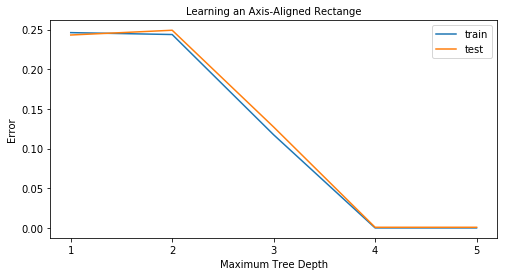

In [184]:
# plot errors by tree depth    
  
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning an Axis-Aligned Rectange', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 



# Let's write some thoughts I have about the way this tree learns.
# So we have four segments that we can essentially divide our data (Technically 8 if we count the reverse, but its the same thing)
# If we see the depth below, thats when our tree finally approximates to 0.
# It says " Do we fall above this segment"
# Do we fall to the right of this segment
# DO we fall to the left of this segment
# Do we fall above this segment.
#It's using those value based decisions to figure out whats in the square and what is not. 
#And we notice the linear learning between 2 and 4.
#However the learning between 1 and 2 is a bit interesting, how it wasn't able to identify a major feature.(Could have been looking at the inbetween points?)
#Again these are just some thoughts that I'm, jotting down.


In [185]:
# learn an origin-aligned circle using x and y using only x and y as features

In [186]:
# generate data for an origin-centered circle centered with radius 0.5 

npts = 10000

#Here we have 5 columns, for the values of x. why? Maybe I will find out and get a value for this?
# Might be tied to the radius, but still not clicking.
X5 = np.zeros((npts,2)) ### I believe this is suppoed to just b2 2, ie for the two features. 
y5 = np.zeros(npts)

for i in range(0,npts): 
    X5[i,0] = np.random.uniform(-1.0,1.0) #Randomize the ponts of 1  by 1.
    X5[i,1] = np.random.uniform(-1.0,1.0) 
    # Notice here, now we have a formula of a circle. 
    # If our point doens't fall in the formula, classify as 0
    # If our pont falls within the formula, classify as 1.
    if ((X5[i,0]**2+X5[i,1]**2) >= 0.5):
        y5[i] = 0
    else:
        y5[i] = 1
  

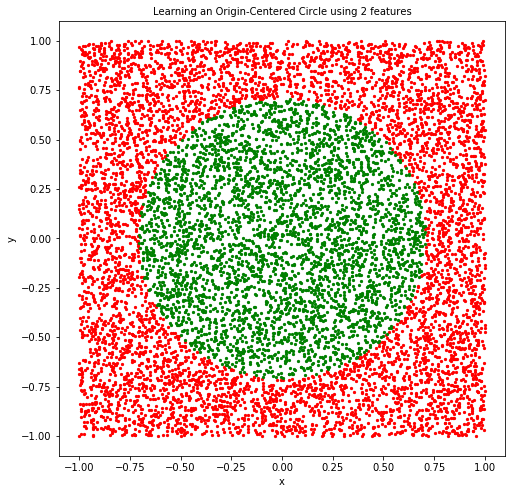

In [187]:
# plot data points
plt.close('all')
plt.figure(figsize=(8, 8))
plt.title('Learning an Origin-Centered Circle using 2 features', fontsize='medium')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x = X5[y5==0, 0], y = X5[y5==0, 1], color='red', label='0', s=5)
plt.scatter(x = X5[y5==1, 0], y = X5[y5==1, 1], color='green', label='1', s=5)
plt.axis(range=1, aspect=1)
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.show()

In [188]:
# split data into 50% training and 50% test data
from sklearn.model_selection import train_test_split

X5_train, X5_test, y5_train, y5_test = train_test_split(
         X5, y5, test_size=0.50, random_state=0)


In [189]:
# Fit for various depth trees
MaxDepth = 10 #here we will iterate though deptsh of 1- 10
DotFileName ='T5.dot'
Errors = np.zeros((MaxDepth,2)) #2 columsn for errors of training + test data. 

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    #Set up a decision tree classifier that uses the impurity of entropy.
    #note we will go through 10 trees.
    
    tree.fit(X5_train, y5_train)
    #Have our decision tree learn from the training data.
    

    #Combine the training + testing data in one array.
    X5_combined = np.vstack((X5_train, X5_test))
    y5_combined = np.hstack((y5_train, y5_test))

    # optional outputs
    z = tree.apply(X5_combined)
    #Return the index of the leaf that each sample is predicted as
    print(z)
    
    dp = tree.decision_path(X5_combined)
    #Print the decision path, or how we got to our final answer. 
    print (dp)
      
    Errors[i,0] = 1 - tree.score(X5_train,y5_train)
    #Compute the mean accuracy on the given train data and labels per tree (And the maximum depth it went through)
    
    Errors[i,1] = 1 - tree.score(X5_test,y5_test)
    #Compute the mean accuracy on the given train data and labels  per tree (And the maximum depth it went through)
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
[1 1 1 ... 2 2 1]
  (0, 0)	1
  (0, 1)	1
  (1, 0)	1
  (1, 1)	1
  (2, 0)	1
  (2, 1)	1
  (3, 0)	1
  (3, 1)	1
  (4, 0)	1
  (4, 1)	1
  (5, 0)	1
  (5, 1)	1
  (6, 0)	1
  (6, 1)	1
  (7, 0)	1
  (7, 1)	1
  (8, 0)	1
  (8, 1)	1
  (9, 0)	1
  (9, 1)	1
  (10, 0)	1
  (10, 1)	1
  (11, 0)	1
  (11, 1)	1
  (12, 0)	1
  :	:
  (9987, 2)	1
  (9988, 0)	1
  (9988, 1)	1
  (9989, 0)	1
  (9989, 1)	1
  (9990, 0)	1
  (9990, 1)	1
  (9991, 0)	1
  (9991, 1)	1
  (9992, 0)	1
  (9992, 1)	1
  (9993, 0)	1
  (9993, 2)	1
  (9994, 0)	1
  (9994, 1)	1
  (9995, 0)	1
  (9995, 1)	1
  (9996, 0)	1
  (9996, 1)	1
  (9997, 0)	1
  (9997, 2)	1
  (9998, 0)	1
  (9998, 2)	1
  (9999, 0)	1
  (9999, 1)	1
1 0.3922 0.39059999999999995
[3 2 3 ... 4 4 2]
  (0, 0)	1
  (0, 1)	1
  (0, 3)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 0)	1
  (2, 1)	1
  (2, 3)	1
  (3, 0)	1
  (3, 1)	1
  (3, 3)	1
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (5, 0)	1
  (5, 1)	1
  (5, 3)	1
  (6, 0)	1
  (6, 1)	1
  (6, 3)	1
  (7, 0)	1
  (7, 1)	1
  (7, 3)	1
  (8, 0)	

In [190]:
# plot the final decision gree
#export_graphviz(tree, out_file='T5.dot', feature_names=['x','y','','',''])
#with open('T5.dot') as f:
#    dot_graph = f.read()
#graphviz.Source(dot_graph)

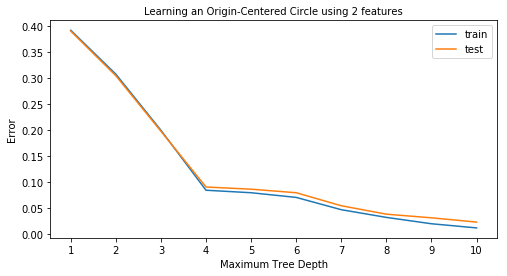

In [191]:
# plot errors by tree depth    
  
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning an Origin-Centered Circle using 2 features', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 

#NOTICE, here we were trying to predict or find a decision tree to learn an origin-centered cirle.
#Here we had the equation of ther circle, and we have two 2 features x and y. 
# This is the formula that it uses:
# (X5[i,0]**2+X5[i,1]**2) >= 0.5
# Here, I am assuming that similar to the square, it's chumking off a bunch of features when first considereing the square (As why we have a linear decrease between depth 1 and 4)
# Then between depth 4 and 6, the tree makes small progress, because we can presume that it's finded more /\ edges of the circle.
# Once the tree learns this patter, it continues to make these small /\ approximations in each step. 

In [192]:
# learn an origin-aligned circle using x, y, x**2, xy, y**2 as the features

In [193]:
# generate data for an circle centered at (1.0,1.0) with radius 0.5

npts = 10000

X5 = np.zeros((npts,5))
y5 = np.zeros(npts)

for i in range(0,npts): 
    X5[i,0] = np.random.uniform(-1.0,1.0) 
    X5[i,1] = np.random.uniform(-1.0,1.0)
    X5[i,2] = X5[i,0]**2
    X5[i,3] = X5[i,0]*X5[i,1]
    X5[i,4] = X5[i,1]**2
    
    
    if (((X5[i,0])**2+(X5[i,1])**2) >= 0.5):
        y5[i] = 0
    else:
        y5[i] = 1
  

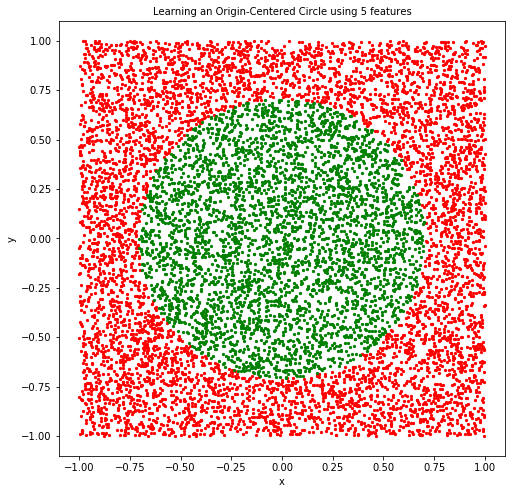

In [194]:
# plot data points
plt.close('all')
plt.figure(figsize=(8, 8))
plt.title('Learning an Origin-Centered Circle using 5 features', fontsize='medium')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x = X5[y5==0, 0], y = X5[y5==0, 1], color='red', label='0', s=5)
plt.scatter(x = X5[y5==1, 0], y = X5[y5==1, 1], color='green', label='1', s=5)
plt.axis(range=1, aspect=1)
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.show()

In [195]:
# split data into 50% training and 50% test data
from sklearn.model_selection import train_test_split

X5_train, X5_test, y5_train, y5_test = train_test_split(
         X5, y5, test_size=0.50, random_state=0)


In [196]:
# Fit for various depth trees
MaxDepth = 10
Errors = np.zeros((MaxDepth,2)) #traning and testing error. Size of max depth. 

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    # Create a decision tree classifier with our impurtiy measure being entropy.
    
    tree.fit(X5_train, y5_train)
    # Have the dtc learn from our training data. 

    #Combine training and testing data. 
    X5_combined = np.vstack((X5_train, X5_test))
    y5_combined = np.hstack((y5_train, y5_test))

    # optional outputs
    z = tree.apply(X5_combined)
    #Get the index of the leaf at which each point ends at. 
    
    #print(z)
    dp = tree.decision_path(X5_combined)
    #Print out the path the tree takes in the dtc to get to the leaf above. 
    
    #print (dp)
      
    Errors[i,0] = 1 - tree.score(X5_train,y5_train)
    #Compute the mean accuracy on the given train data and labels per tree (And the maximum depth it went through)
    
    
    Errors[i,1] = 1 - tree.score(X5_test,y5_test)
    #Compute the mean accuracy on the given test data and labels per tree (And the maximum depth it went through)
    # ie predicted correct/ total predictions ? 
    
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
1 0.30300000000000005 0.31020000000000003
2 0.09240000000000004 0.09419999999999995
3 0.054200000000000026 0.05459999999999998
4 0.015000000000000013 0.02200000000000002
5 0.014800000000000035 0.022199999999999998
6 0.010600000000000054 0.01739999999999997
7 0.010600000000000054 0.01739999999999997
8 0.005199999999999982 0.011199999999999988
9 0.0026000000000000467 0.010199999999999987
10 0.0018000000000000238 0.009000000000000008


In [197]:
# plot the final decision gree
#export_graphviz(tree, out_file='t5a.dot', feature_names=['x','y,','x**2','xy','y**2'])
#with open('T5a.dot') as f:
#    dot_graph = f.read()
#graphviz.Source(dot_graph)

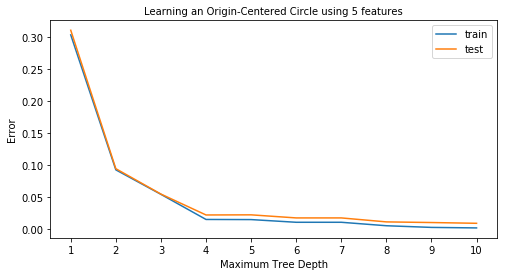

In [198]:
# plot errors by tree depth    
  
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning an Origin-Centered Circle using 5 features', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 

#Notice here that 1. we converge quicker that using only 2 features. 
# At only the second leaf, we were able to see a 83% decrease or 1900% increase (desired) in the way that it should have been!
# From 2 to 4, we also get a sharp decrease. But this time we are under 0.05 where for 2 features we were around 0.10.

# Becasue of these features, we can assume that the tree realizes that features x^2 and y^2 are of most importance
# as the formula of a circle has to do with x^2+y^2 
# Let's see more of this in the next example.


# Also, digure out how we can show the exact features the decision tree is using. Because right now I'm making human assumptions of how it connects to the formula.


In [199]:
# learn an origin-aligned circle using x, y, x**2, xy, y**2 AND (x**2+y**2) as feature

In [200]:
# generate data for an circle centered at (1.0,1.0) with radius 0.5

npts = 10000

#6 features ^
X6 = np.zeros((npts,6))
y6 = np.zeros(npts)

for i in range(0,npts): 
    #Add in the features.
    X6[i,0] = np.random.uniform(-1.0,1.0) 
    X6[i,1] = np.random.uniform(-1.0,1.0)
    X6[i,2] = X6[i,0]**2
    X6[i,3] = X6[i,0]*X5[i,1]
    X6[i,4] = X6[i,1]**2
    X6[i,5] = X6[i,0]**2+X6[i,1]**2
    
    
    #Again, we utalize the same equation for a tree. 
    if (((X6[i,0])**2+(X6[i,1])**2) >= 0.5):
        y6[i] = 0
    else:
        y6[i] = 1
  

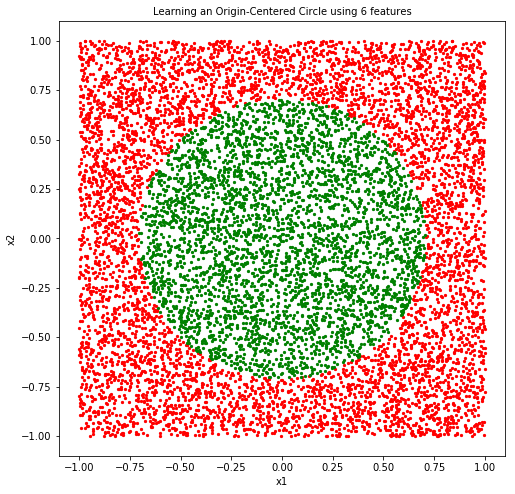

In [201]:
# plot data points
plt.close('all')
plt.figure(figsize=(8, 8))
plt.title('Learning an Origin-Centered Circle using 6 features', fontsize='medium')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(x = X6[y6==0, 0], y = X6[y6==0, 1], color='red', label='0', s=5)
plt.scatter(x = X6[y6==1, 0], y = X6[y6==1, 1], color='green', label='1', s=5)
plt.axis(range=1, aspect=1)
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.show()

In [202]:
# split data into 50% training and 50% test data
from sklearn.model_selection import train_test_split

X6_train, X6_test, y6_train, y6_test = train_test_split(
         X6, y6, test_size=0.50, random_state=0)


In [203]:
# Fit for various depth trees
MaxDepth = 10
Errors = np.zeros((MaxDepth,2)) #Depth, training, testing error.

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    # Create a decision tree classifier with impurity measure of entroy. 
    
    tree.fit(X6_train, y6_train)
    # Use the training data to help the model learn

    #Combine testing + training data.
    X6_combined = np.vstack((X6_train, X6_test))
    y6_combined = np.hstack((y6_train, y6_test))

    # optional outputs
    z = tree.apply(X6_combined)
    #compute the leaf index of which each sample point ends in
    #print(z)
    dp = tree.decision_path(X6_combined)
    #compute the path that each sample point takes in the tree to end up in the final leaf
    #print (dp)
      
    Errors[i,0] = 1 - tree.score(X6_train,y6_train)
    #Compute the mean accuracy on the given train data and labels per tree (And the maximum depth it went through)
    
    Errors[i,1] = 1 - tree.score(X6_test,y6_test)
    #Compute the mean accuracy on the given test data and labels per tree (And the maximum depth it went through)
    
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
1 0.0 0.0
2 0.0 0.0
3 0.0 0.0
4 0.0 0.0
5 0.0 0.0
6 0.0 0.0
7 0.0 0.0
8 0.0 0.0
9 0.0 0.0
10 0.0 0.0


In [204]:
# plot the final decision gree
#export_graphviz(tree, out_file='T6.dot', feature_names=['x','y,','x**2','xy','y**2','x**2+y**2'])
#with open('T6.dot') as f:
#    dot_graph = f.read()
#graphviz.Source(dot_graph)

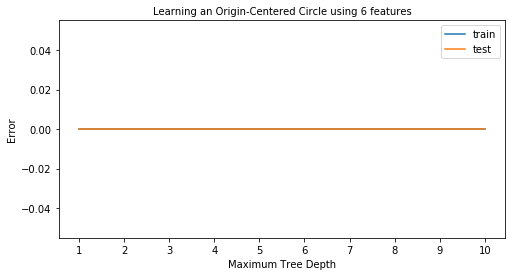

In [205]:
# plot errors by tree depth    
  
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning an Origin-Centered Circle using 6 features', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 

#Wow, here we have perfect error at each depth. The tree learned that the formula value or X6[last index] which is basically the formula,
#Is what is needed to represent the tree.


In [206]:
#Here we were able to see that, the more our features aligned to the desired formuula, the more accurate our model was for both training and testing data.
# For just x and y we had 10 iterations and still off 0 error.
# As we added feature x^2 and y^2, we saw a ~ 50+% overall increase in accuracy.

# Then for our feature being exactly the same as ut data point, we realied that only this 1 feature was needed to determine how the points represent a circle. 

In [207]:
# learn a rhombus with angles of 45, 135, 45, 135. The length of each side is 1 
# The four verticies are (0.0) (2*sin(67.5), 0) (sin(67.5), sin(22.5)) (-sin(67.5), -sin(22.5))

In [208]:
# Generate the rhombus with verticies (0.0) (2*sin(67.5), 0) (sin(67.5), sin(22.5)) (-sin(67.5), -sin(22.5))
# We will only use the features x and y. 

#Let's use 1k points
npts = 10000

#2 features just X and Y
X2 = np.zeros((npts,2))
y2 = np.zeros(npts)

#print(X2)
#print(y2)

# NOTE, I am establishing the region of 2*2 that way we have a decent amount of space to be outside of the rhombus.
# NOTE, NOT using bitwise comparison

for i in range(0,npts): 
    #Iterate through the samples, generate the points, the features, and provide its classification label
    X2[i,0] = np.random.uniform(-2.0,4.0)  # Feature X
    X2[i,1] = np.random.uniform(-2*math.sin(math.radians(22.5)),2*math.sin(math.radians(22.5)))  # Feature Y
 
    
    
    # To be a rhombus, you must fall within these points. 
    if (X2[i, 0] >= 0 and X2[i, 0] <= math.sin(math.radians(67.5))):
        if((X2[i, 1] <= ((math.sin(math.radians(22.5))/math.sin(math.radians(67.5)))*X2[i, 0])) and (X2[i, 1] >= (-(math.sin(np.radians(22.5))/np.sin(math.radians(67.5)))*X2[i, 0]))):
            y2[i] = 1
        else:
            y2[i] = 0
    elif(X2[i, 0] >= math.sin(math.radians(67.5)) and X2[i, 0] <= (2*math.sin(math.radians(67.5)))):
        if((X2[i, 1] >= (((math.sin(math.radians(22.5))/math.sin(math.radians(67.5)))*X2[i,0])-(2*math.sin(math.radians(22.5)))) ) and (X2[i, 1] <= ((-1*(math.sin(math.radians(22.5))/math.sin(math.radians(67.5)))*X2[i, 0]))+2*math.sin(math.radians(22.5))) ):
            y2[i] = 1
        else:
            y2[i] = 0
    else:
            y2[i] = 0

#print(X2)
#print(y2)



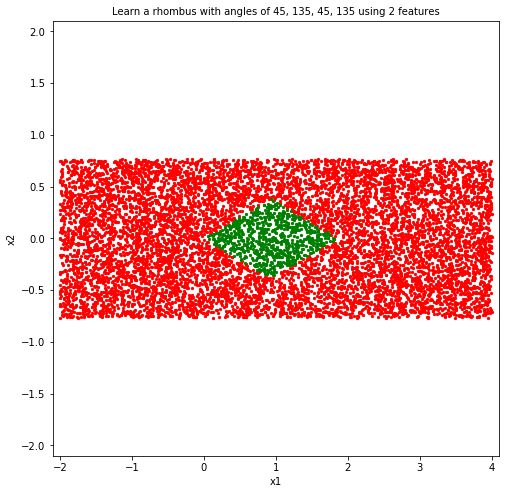

In [209]:
# plot data points
plt.close('all')
plt.figure(figsize=(8, 8))
plt.title('Learn a rhombus with angles of 45, 135, 45, 135 using 2 features', fontsize='medium')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(x = X2[y2==0, 0], y = X2[y2==0, 1], color='red', label='0', s=5)
plt.scatter(x = X2[y2==1, 0], y = X2[y2==1, 1], color='green', label='1', s=5)
plt.axis(range=1, aspect=1)
plt.xlim(-2.1,4.1)
plt.ylim(-2.1,2.1)
plt.show()

In [210]:
# split data into 50% training and 50% test data
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(
         X2, y2, test_size=0.50, random_state=0)



In [211]:
# Fit for various depth trees
MaxDepth = 10
X2Errors = np.zeros((MaxDepth,2)) #Depth, training, testing error.

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    # Create a decision tree classifier with impurity measure of entroy. 
    
    tree.fit(X2_train, y2_train)
    # Use the training data to help the model learn

    #Combine testing + training data.
    X2_combined = np.vstack((X2_train, X2_test))
    y2_combined = np.hstack((y2_train, y2_test))

    # optional outputs
    z = tree.apply(X2_combined)
    #compute the leaf index of which each sample point ends in
    #print(z)
    dp = tree.decision_path(X2_combined)
    #compute the path that each sample point takes in the tree to end up in the final leaf
    #print (dp)
      
    X2Errors[i,0] = 1 - tree.score(X2_train,y2_train)
    #Compute the mean accuracy on the given train data and labels per tree (And the maximum depth it went through)
    
    X2Errors[i,1] = 1 - tree.score(X2_test,y2_test)
    #Compute the mean accuracy on the given test data and labels per tree (And the maximum depth it went through)
    
    print(i+1,X2Errors[i,0],X2Errors[i,1])

Max Depth, Training, Test
1 0.08499999999999996 0.07320000000000004
2 0.08499999999999996 0.07320000000000004
3 0.08499999999999996 0.07320000000000004
4 0.043399999999999994 0.04279999999999995
5 0.034399999999999986 0.03839999999999999
6 0.029200000000000004 0.03059999999999996
7 0.02059999999999995 0.024800000000000044
8 0.01200000000000001 0.019000000000000017
9 0.005600000000000049 0.011399999999999966
10 0.0023999999999999577 0.010399999999999965


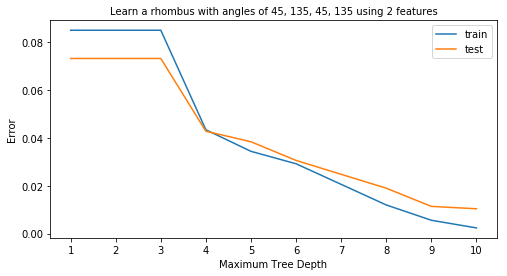

In [212]:
# plot errors by tree depth    
  
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learn a rhombus with angles of 45, 135, 45, 135 using 2 features', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),X2Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),X2Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 

#Wow, here we have perfect error at each depth. The tree learned that the formula value or X6[last index] which is basically the formula,
#Is what is needed to represent the tree.



In [213]:
# TO DO: Write down my thoughts about what might be happening and why. 

In [214]:
# learn a rhombus with angles of 45, 135, 45, 135. The length of each side is 1 
# The four verticies are (0.0) (2*sin(67.5), 0) (sin(67.5), sin(22.5)) (-sin(67.5), -sin(22.5))

In [215]:
# Generate the rhombus with verticies (0.0) (2*sin(67.5), 0) (sin(67.5), sin(22.5)) (-sin(67.5), -sin(22.5))
# We will only use four features: x y the positive slope lines ie sin(22.5)/sin(67.5) * x and -sin(22.5)*sin(67.5)*2


# NOTE, My initial assumption is that adding these two features will allow the tree to decrease it's depth by about half.
# This is because if it learns the two slop lines, it can eliminate half of the data that falls below/above that line or I should say under potentially 22.5/67.5 and above -22.5/67.5 for one side (The reverse for the other)


#Let's use 1k points
npts = 10000

#4 features 
X4 = np.zeros((npts,4))
y4 = np.zeros(npts)

#print(X2)
#print(y2)

# NOTE, I am establishing the region of 2*2 that way we have a decent amount of space to be outside of the rhombus.
# NOTE, NOT using bitwise comparison

for i in range(0,npts): 
    #Iterate through the samples, generate the points, the features, and provide its classification label
    X4[i,0] = np.random.uniform(-2.0,4.0)  # Feature X
    X4[i,1] = np.random.uniform(-2*math.sin(math.radians(22.5)),2*math.sin(math.radians(22.5)))  # Feature Y
    X4[i, 2] =  (math.sin(math.radians(22.5))/math.sin(math.radians(67.5)))*X4[i, 0]
    X4[i, 3] =  (-1*(math.sin(math.radians(22.5))/math.sin(math.radians(67.5)))*X4[i, 0])
    
    
    # To be a rhombus, you must fall within these points. 
    if (X4[i, 0] >= 0 and X4[i, 0] <= math.sin(math.radians(67.5))):
        if((X4[i, 1] <= ((math.sin(math.radians(22.5))/math.sin(math.radians(67.5)))*X4[i, 0])) and (X4[i, 1] >= (-(math.sin(np.radians(22.5))/np.sin(math.radians(67.5)))*X4[i, 0]))):
            y4[i] = 1
        else:
            y4[i] = 0
    elif(X4[i, 0] >= math.sin(math.radians(67.5)) and X4[i, 0] <= (2*math.sin(math.radians(67.5)))):
        if((X4[i, 1] >= (((math.sin(math.radians(22.5))/math.sin(math.radians(67.5)))*X4[i,0])-(2*math.sin(math.radians(22.5)))) ) and (X4[i, 1] <= ((-1*(math.sin(math.radians(22.5))/math.sin(math.radians(67.5)))*X4[i, 0]))+2*math.sin(math.radians(22.5))) ):
            y4[i] = 1
        else:
            y4[i] = 0
    else:
            y4[i] = 0

print(X4)
print(y4)




[[-1.81404427e+00  4.63557398e-01 -7.51401738e-01  7.51401738e-01]
 [ 8.63360468e-01 -1.48352828e-03  3.57615615e-01 -3.57615615e-01]
 [ 2.59863766e+00 -6.52576763e-01  1.07639096e+00 -1.07639096e+00]
 ...
 [ 1.56279612e+00  5.62846386e-01  6.47331348e-01 -6.47331348e-01]
 [ 1.75382461e+00  1.25915517e-01  7.26457941e-01 -7.26457941e-01]
 [-9.87414535e-01  3.76015649e-01 -4.09000492e-01  4.09000492e-01]]
[0. 1. 0. ... 0. 0. 0.]


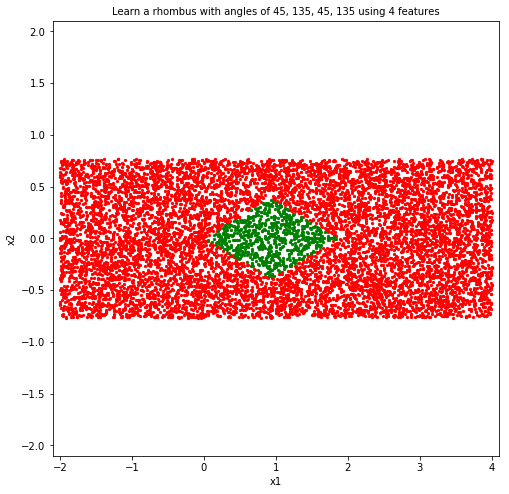

In [216]:
# plot data points
plt.close('all')
plt.figure(figsize=(8, 8))
plt.title('Learn a rhombus with angles of 45, 135, 45, 135 using 4 features', fontsize='medium')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(x = X4[y4==0, 0], y = X4[y4==0, 1], color='red', label='0', s=5)
plt.scatter(x = X4[y4==1, 0], y = X4[y4==1, 1], color='green', label='1', s=5)
plt.axis(range=1, aspect=1)
plt.xlim(-2.1,4.1)
plt.ylim(-2.1,2.1)
plt.show()

In [217]:
# split data into 50% training and 50% test data
from sklearn.model_selection import train_test_split

X4_train, X4_test, y4_train, y4_test = train_test_split(
         X4, y4, test_size=0.50, random_state=0)




In [218]:
# Fit for various depth trees
MaxDepth = 10
X4Errors = np.zeros((MaxDepth,2)) #Depth, training, testing error.

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    # Create a decision tree classifier with impurity measure of entroy. 
    
    tree.fit(X4_train, y4_train)
    # Use the training data to help the model learn

    #Combine testing + training data.
    X4_combined = np.vstack((X4_train, X4_test))
    y4_combined = np.hstack((y4_train, y4_test))

    # optional outputs
    z = tree.apply(X4_combined)
    #compute the leaf index of which each sample point ends in
    #print(z)
    dp = tree.decision_path(X4_combined)
    #compute the path that each sample point takes in the tree to end up in the final leaf
    #print (dp)
      
    X4Errors[i,0] = 1 - tree.score(X4_train,y4_train)
    #Compute the mean accuracy on the given train data and labels per tree (And the maximum depth it went through)
    
    X4Errors[i,1] = 1 - tree.score(X4_test,y4_test)
    #Compute the mean accuracy on the given test data and labels per tree (And the maximum depth it went through)
    
    print(i+1,X4Errors[i,0],X4Errors[i,1])

Max Depth, Training, Test
1 0.07799999999999996 0.0736
2 0.07799999999999996 0.0736
3 0.07799999999999996 0.0736
4 0.036599999999999966 0.036800000000000055
5 0.024800000000000044 0.03059999999999996
6 0.020199999999999996 0.026599999999999957
7 0.013000000000000012 0.018000000000000016
8 0.006199999999999983 0.013599999999999945
9 0.0016000000000000458 0.011800000000000033
10 0.0006000000000000449 0.009399999999999964


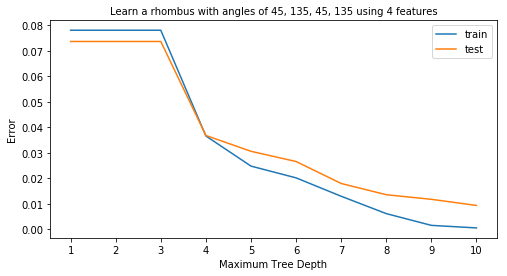

In [219]:
# plot errors by tree depth    
  
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learn a rhombus with angles of 45, 135, 45, 135 using 4 features', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),X4Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),X4Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 

#Wow, here we have perfect error at each depth. The tree learned that the formula value or X6[last index] which is basically the formula,
#Is what is needed to represent the tree.




In [220]:
# TO DO: Add your notes to why you thought this would happen.
# TO be honest, I was expecting a larger decrease in error,
# This is becasue  I thought the decision tree would realize that the two \/ slopes provided would be cut off points. 

In [221]:
# learn a rhombus with angles of 45, 135, 45, 135. The length of each side is 1 
# The four verticies are (0.0) (2*sin(67.5), 0) (sin(67.5), sin(22.5)) (-sin(67.5), -sin(22.5))

In [222]:
# Generate the rhombus with verticies (0.0) (2*sin(67.5), 0) (sin(67.5), sin(22.5)) (-sin(67.5), -sin(22.5))
# We will only use six features: 
# x y 
# the positive slope lines ie sin(22.5)/sin(67.5) * x and -sin(22.5)*sin(67.5)*2
# And sin(22.5)/sin(67.5)*x - 2*sin(22.5)
# And -sin(22.5)/sin(67.5)*x + 2*sin(22.5) // The other slope lines. 


# NOTE, My initial assumption is that adding these two additional features, now the decision tree had 4 slopes, or the four sides
# I'm hoping that it can make preditions such as x*slope + b for all four sides


#Let's use 1k points
npts = 10000

#6 features 
X6 = np.zeros((npts,6))
y6 = np.zeros(npts)

#print(X2)
#print(y2)

# NOTE, I am establishing the region of 2*2 that way we have a decent amount of space to be outside of the rhombus.
# NOTE, NOT using bitwise comparison

for i in range(0,npts): 
    #Iterate through the samples, generate the points, the features, and provide its classification label
    X6[i,0] = np.random.uniform(-2.0,4.0)  # Feature X
    X6[i,1] = np.random.uniform(-2*math.sin(math.radians(22.5)),2*math.sin(math.radians(22.5)))  # Feature Y
    X6[i, 2] =  (math.sin(math.radians(22.5))/math.sin(math.radians(67.5)))*X6[i, 0]
    X6[i, 3] =  (-1*(math.sin(math.radians(22.5))/math.sin(math.radians(67.5)))*X6[i, 0])
    X6[i, 4] = (math.sin(math.radians(22.5))/math.sin(math.radians(67.5)))*X6[i, 0]+(-2*math.sin(math.radians(22.5)))
    X6[i, 5] = (-1*(math.sin(math.radians(22.5))/math.sin(math.radians(67.5)))*X6[i, 0])+2*math.sin(math.radians(22.5))
    
    
    # To be a rhombus, you must fall within these points. 
    if (X6[i, 0] >= 0 and X6[i, 0] <= math.sin(math.radians(67.5))):
        if((X6[i, 1] <= ((math.sin(math.radians(22.5))/math.sin(math.radians(67.5)))*X6[i, 0])) and (X6[i, 1] >= (-(math.sin(np.radians(22.5))/np.sin(math.radians(67.5)))*X6[i, 0]))):
            y6[i] = 1
        else:
            y6[i] = 0
    elif(X6[i, 0] >= math.sin(math.radians(67.5)) and X6[i, 0] <= (2*math.sin(math.radians(67.5)))):
        if((X6[i, 1] >= (((math.sin(math.radians(22.5))/math.sin(math.radians(67.5)))*X6[i,0])-(2*math.sin(math.radians(22.5)))) ) and (X6[i, 1] <= ((-1*(math.sin(math.radians(22.5))/math.sin(math.radians(67.5)))*X6[i, 0]))+2*math.sin(math.radians(22.5))) ):
            y6[i] = 1
        else:
            y6[i] = 0
    else:
            y6[i] = 0

print(X6)
print(y6)





[[ 1.95944798  0.37073664  0.81162993 -0.81162993  0.04626306 -0.04626306]
 [-1.18598719  0.65779845 -0.49125198  0.49125198 -1.25661884  1.25661884]
 [ 2.36523991  0.05344622  0.97971445 -0.97971445  0.21434758 -0.21434758]
 ...
 [-0.97034646  0.76202813 -0.40193066  0.40193066 -1.16729753  1.16729753]
 [-0.20722104  0.05943473 -0.08583376  0.08583376 -0.85120063  0.85120063]
 [-0.32790256 -0.51212618 -0.13582169  0.13582169 -0.90118855  0.90118855]]
[0. 0. 0. ... 0. 0. 0.]


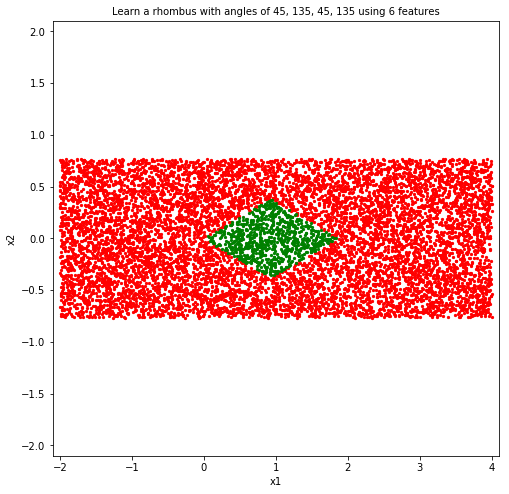

In [223]:
# plot data points
plt.close('all')
plt.figure(figsize=(8, 8))
plt.title('Learn a rhombus with angles of 45, 135, 45, 135 using 6 features', fontsize='medium')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(x = X6[y6==0, 0], y = X6[y6==0, 1], color='red', label='0', s=5)
plt.scatter(x = X6[y6==1, 0], y = X6[y6==1, 1], color='green', label='1', s=5)
plt.axis(range=1, aspect=1)
plt.xlim(-2.1,4.1)
plt.ylim(-2.1,2.1)
plt.show()

In [224]:
# split data into 50% training and 50% test data
from sklearn.model_selection import train_test_split

X6_train, X6_test, y6_train, y6_test = train_test_split(
         X6, y6, test_size=0.50, random_state=0)





In [225]:
# Fit for various depth trees
MaxDepth = 10
X6Errors = np.zeros((MaxDepth,2)) #Depth, training, testing error.

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    # Create a decision tree classifier with impurity measure of entroy. 
    
    tree.fit(X6_train, y6_train)
    # Use the training data to help the model learn

    #Combine testing + training data.
    X6_combined = np.vstack((X6_train, X6_test))
    y6_combined = np.hstack((y6_train, y6_test))

    # optional outputs
    z = tree.apply(X6_combined)
    #compute the leaf index of which each sample point ends in
    #print(z)
    dp = tree.decision_path(X6_combined)
    #compute the path that each sample point takes in the tree to end up in the final leaf
    #print (dp)
      
    X6Errors[i,0] = 1 - tree.score(X6_train,y6_train)
    #Compute the mean accuracy on the given train data and labels per tree (And the maximum depth it went through)
    
    X6Errors[i,1] = 1 - tree.score(X6_test,y6_test)
    #Compute the mean accuracy on the given test data and labels per tree (And the maximum depth it went through)
    
    print(i+1,X6Errors[i,0],X6Errors[i,1])

Max Depth, Training, Test
1 0.08299999999999996 0.07699999999999996
2 0.08299999999999996 0.07699999999999996
3 0.08299999999999996 0.07699999999999996
4 0.03639999999999999 0.045599999999999974
5 0.027800000000000047 0.03520000000000001
6 0.027800000000000047 0.03520000000000001
7 0.015800000000000036 0.023800000000000043
8 0.00880000000000003 0.018399999999999972
9 0.005800000000000027 0.01539999999999997
10 0.0010000000000000009 0.010399999999999965


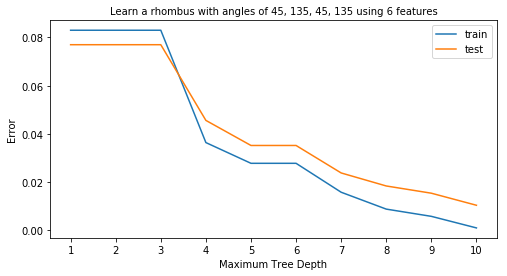

In [226]:
# plot errors by tree depth    
  
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learn a rhombus with angles of 45, 135, 45, 135 using 6 features', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),X6Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),X6Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 

#Wow, here we have perfect error at each depth. The tree learned that the formula value or X6[last index] which is basically the formula,
#Is what is needed to represent the tree.





In [227]:
# Generate the rhombus with verticies (0.0) (2*sin(67.5), 0) (sin(67.5), sin(22.5)) (-sin(67.5), -sin(22.5))
# We will only use six features: 
# x y 
# the positive slope lines ie sin(22.5)/sin(67.5) * x and -sin(22.5)*sin(67.5)*2
# And sin(22.5)/sin(67.5)*x - 2*sin(22.5)
# And -sin(22.5)/sin(67.5)*x + 2*sin(22.5) // The other slope lines. 


# NOTE, My initial assumption is that adding these two additional features, now the decision tree had 4 slopes, or the four sides
# I'm hoping that it can make preditions such as x*slope + b for all four sides


#Let's use 1k points
npts = 10000

#8 features 
X8 = np.zeros((npts,8))
y8 = np.zeros(npts)

#print(X2)
#print(y2)

# NOTE, I am establishing the region of 2*2 that way we have a decent amount of space to be outside of the rhombus.
# NOTE, NOT using bitwise comparison

for i in range(0,npts): 
    #Iterate through the samples, generate the points, the features, and provide its classification label
    X8[i,0] = np.random.uniform(-2.0,4.0)  # Feature X
    X8[i,1] = np.random.uniform(-2*math.sin(math.radians(22.5)),2*math.sin(math.radians(22.5)))  # Feature Y
    X8[i, 2] =  (math.sin(math.radians(22.5))/math.sin(math.radians(67.5)))*X8[i, 0]
    X8[i, 3] =  (-1*(math.sin(math.radians(22.5))/math.sin(math.radians(67.5)))*X8[i, 0])
    X8[i, 4] = (math.sin(math.radians(22.5))/math.sin(math.radians(67.5)))*X8[i, 0]+(-2*math.sin(math.radians(22.5)))
    X8[i, 5] = (-1*(math.sin(math.radians(22.5))/math.sin(math.radians(67.5)))*X8[i, 0])+2*math.sin(math.radians(22.5))
    X8[i, 6] = X8[i,0] +  X8[i,1]
    X8[i, 7] = X8[i,0] -  X8[i,1]
    
    # To be a rhombus, you must fall within these points. 
    if (X8[i, 0] >= 0 and X8[i, 0] <= math.sin(math.radians(67.5))):
        if((X8[i, 1] <= ((math.sin(math.radians(22.5))/math.sin(math.radians(67.5)))*X8[i, 0])) and (X8[i, 1] >= (-(math.sin(np.radians(22.5))/np.sin(math.radians(67.5)))*X8[i, 0]))):
            y8[i] = 1
        else:
            y8[i] = 0
    elif(X8[i, 0] >= math.sin(math.radians(67.5)) and X8[i, 0] <= (2*math.sin(math.radians(67.5)))):
        if((X8[i, 1] >= (((math.sin(math.radians(22.5))/math.sin(math.radians(67.5)))*X8[i,0])-(2*math.sin(math.radians(22.5)))) ) and (X8[i, 1] <= ((-1*(math.sin(math.radians(22.5))/math.sin(math.radians(67.5)))*X8[i, 0]))+2*math.sin(math.radians(22.5))) ):
            y8[i] = 1
        else:
            y8[i] = 0
    else:
            y8[i] = 0

print(X8)
print(y8)






[[ 0.06257998  0.04178726  0.02592148 ...  0.73944539  0.10436725
   0.02079272]
 [ 2.98043792  0.66639729  1.23453781 ... -0.46917095  3.64683522
   2.31404063]
 [-1.25457857 -0.09563761 -0.51966346 ...  1.28503033 -1.35021619
  -1.15894096]
 ...
 [ 2.53748635 -0.00877841  1.05106126 ... -0.28569439  2.52870794
   2.54626476]
 [ 1.16089696  0.11417642  0.48085927 ...  0.2845076   1.27507338
   1.04672054]
 [ 0.83159115 -0.51067631  0.34445633 ...  0.42091053  0.32091484
   1.34226746]]
[0. 0. 0. ... 0. 1. 0.]


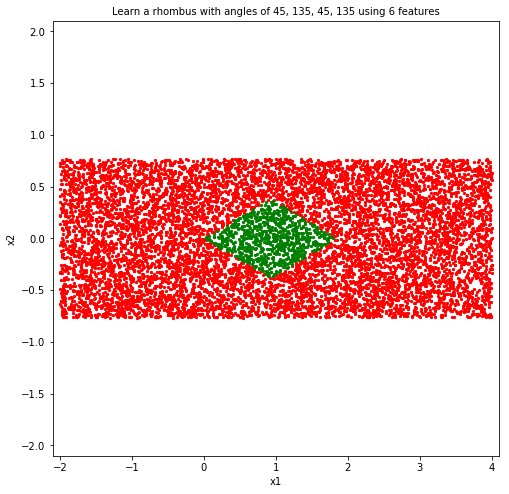

In [228]:
# plot data points
plt.close('all')
plt.figure(figsize=(8, 8))
plt.title('Learn a rhombus with angles of 45, 135, 45, 135 using 6 features', fontsize='medium')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(x = X8[y8==0, 0], y = X8[y8==0, 1], color='red', label='0', s=5)
plt.scatter(x = X8[y8==1, 0], y = X8[y8==1, 1], color='green', label='1', s=5)
plt.axis(range=1, aspect=1)
plt.xlim(-2.1,4.1)
plt.ylim(-2.1,2.1)
plt.show()

In [229]:
# split data into 50% training and 50% test data
from sklearn.model_selection import train_test_split

X8_train, X8_test, y8_train, y8_test = train_test_split(
         X8, y8, test_size=0.50, random_state=0)






In [230]:
# Fit for various depth trees
MaxDepth = 10
X8Errors = np.zeros((MaxDepth,2)) #Depth, training, testing error.

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    # Create a decision tree classifier with impurity measure of entroy. 
    
    tree.fit(X8_train, y8_train)
    # Use the training data to help the model learn

    #Combine testing + training data.
    X8_combined = np.vstack((X8_train, X8_test))
    y8_combined = np.hstack((y8_train, y8_test))

    # optional outputs
    z = tree.apply(X8_combined)
    #compute the leaf index of which each sample point ends in
    #print(z)
    dp = tree.decision_path(X8_combined)
    #compute the path that each sample point takes in the tree to end up in the final leaf
    #print (dp)
      
    X8Errors[i,0] = 1 - tree.score(X8_train,y8_train)
    #Compute the mean accuracy on the given train data and labels per tree (And the maximum depth it went through)
    
    X8Errors[i,1] = 1 - tree.score(X8_test,y8_test)
    #Compute the mean accuracy on the given test data and labels per tree (And the maximum depth it went through)
    
    print(i+1,X8Errors[i,0],X8Errors[i,1])

Max Depth, Training, Test
1 0.08199999999999996 0.08299999999999996
2 0.08199999999999996 0.08299999999999996
3 0.07999999999999996 0.08599999999999997
4 0.02859999999999996 0.03420000000000001
5 0.02100000000000002 0.027599999999999958
6 0.01880000000000004 0.024599999999999955
7 0.010199999999999987 0.020399999999999974
8 0.0046000000000000485 0.014000000000000012
9 0.0013999999999999568 0.01200000000000001
10 0.0006000000000000449 0.010800000000000032


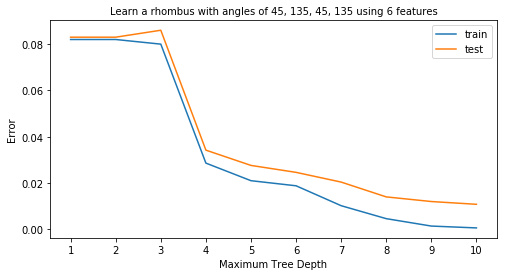

In [231]:
# plot errors by tree depth    
  
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learn a rhombus with angles of 45, 135, 45, 135 using 6 features', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),X8Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),X8Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 

#Wow, here we have perfect error at each depth. The tree learned that the formula value or X6[last index] which is basically the formula,
#Is what is needed to represent the tree.






In [232]:
# Testing an oriented verison of the rhombus with verticiies at (0,0) (1.0, 0), (sin(45), sin(45)), (1+sin(45), sin(45))

In [233]:


#Let's use 1k points
npts = 10000

#4 features 
XOriented = np.zeros((npts,4))
yOriented = np.zeros(npts)



for i in range(0,npts): 
    #Iterate through the samples, generate the points, the features, and provide its classification label
    XOriented[i,0] = np.random.uniform(-0.5,2)  # Feature X
    XOriented[i,1] = np.random.uniform(-0.4, 1)  # Feature Y
    XOriented[i, 2] = XOriented[i,0] +  XOriented[i,1] # Feature X+Y
    XOriented[i, 3] = XOriented[i,0] -  XOriented[i,1] # Feature X - Y
    
    # To be a rhombus, you must fall within these points. 
    if (XOriented[i, 0] >= 0 and XOriented[i, 0] <= math.sin(math.radians(45))):
        if((XOriented[i, 1] <= XOriented[i, 0]) and XOriented[i, 1] >= 0):
            yOriented[i] = 1
        else:
            yOriented[i] = 0
    elif(XOriented[i, 0] >= math.sin(math.radians(45)) and XOriented[i, 0] <= 1 ):
        if(XOriented[i, 1] >= 0  and (XOriented[i, 1] <= math.sin(math.radians(45)))) :
               yOriented[i] = 1
        else:
               yOriented[i] = 0
    elif( (XOriented[i,0] >= 1) and (XOriented[i,0] <= 1+math.sin(math.radians(45)))   ):
        if(XOriented[i, 1] >= XOriented[i, 0] -1 and XOriented[i, 1] <= math.sin(math.radians(45))):
                yOriented[i] = 1
        else:
                yOriented[i] = 0
    else:
            yOriented[i] = 0
    








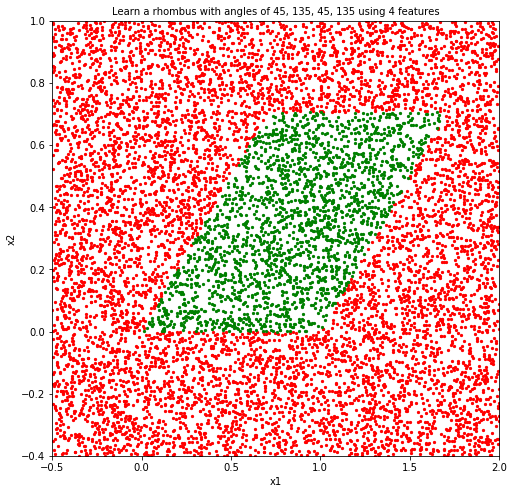

In [234]:
# plot data points
plt.close('all')
plt.figure(figsize=(8, 8))
plt.title('Learn a rhombus with angles of 45, 135, 45, 135 using 4 features', fontsize='medium')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(x = XOriented[yOriented==0, 0], y = XOriented[yOriented==0, 1], color='red', label='0', s=5)
plt.scatter(x = XOriented[yOriented==1, 0], y = XOriented[yOriented==1, 1], color='green', label='1', s=5)
plt.axis(range=1, aspect=1)
plt.xlim(-0.5,2)
plt.ylim(-0.4,1)
plt.show()

In [235]:
# split data into 50% training and 50% test data
from sklearn.model_selection import train_test_split

XOriented_train, XOriented_test, yOriented_train, yOriented_test = train_test_split(
         XOriented, yOriented, test_size=0.50, random_state=0)








# Fit for various depth trees
MaxDepth = 10
XOrientedErrors = np.zeros((MaxDepth,2)) #Depth, training, testing error.

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    # Create a decision tree classifier with impurity measure of entroy. 
    
    tree.fit(XOriented_train, yOriented_train)
    # Use the training data to help the model learn

    #Combine testing + training data.
    XOriented_combined = np.vstack((XOriented_train, XOriented_test))
    yOriented_combined = np.hstack((yOriented_train, yOriented_test))

    # optional outputs
    z = tree.apply(XOriented_combined)
    #compute the leaf index of which each sample point ends in
    #print(z)
    dp = tree.decision_path(XOriented_combined)
    #compute the path that each sample point takes in the tree to end up in the final leaf
    #print (dp)
      
    XOrientedErrors[i,0] = 1 - tree.score(XOriented_train,yOriented_train)
    #Compute the mean accuracy on the given train data and labels per tree (And the maximum depth it went through)
    
    XOrientedErrors[i,1] = 1 - tree.score(XOriented_test,yOriented_test)
    #Compute the mean accuracy on the given test data and labels per tree (And the maximum depth it went through)
    
    print(i+1,XOrientedErrors[i,0],XOrientedErrors[i,1])

Max Depth, Training, Test
1 0.21220000000000006 0.20779999999999998
2 0.1966 0.20879999999999999
3 0.08740000000000003 0.0826
4 0.0 0.0008000000000000229
5 0.0 0.0008000000000000229
6 0.0 0.0008000000000000229
7 0.0 0.0008000000000000229
8 0.0 0.0008000000000000229
9 0.0 0.0008000000000000229
10 0.0 0.0008000000000000229


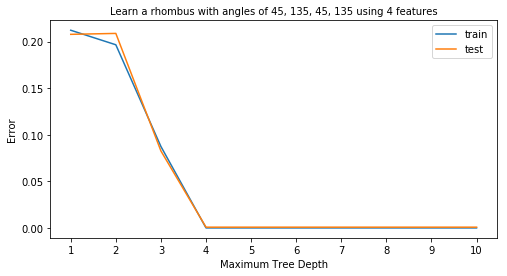

In [236]:
# plot errors by tree depth    
  
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learn a rhombus with angles of 45, 135, 45, 135 using 4 features', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),XOrientedErrors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),XOrientedErrors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 

#Wow, here we have perfect error at each depth. The tree learned that the formula value or X6[last index] which is basically the formula,
#Is what is needed to represent the tree.








In [237]:

print ('Max Depth, Training 2, Test 2, Training 4, Testing 4, Training 6, Testing 6, Training 8, Testing 8')
for i in range(0,10):
    print(i+1,X2Errors[i,0],X2Errors[i,1], X4Errors[i,0], X4Errors[i,1], X6Errors[i,0], X6Errors[i,1], X8Errors[i,0], X8Errors[i,1], XOrientedErrors[i,0], XOrientedErrors[i,1] )

Max Depth, Training 2, Test 2, Training 4, Testing 4, Training 6, Testing 6, Training 8, Testing 8
1 0.08499999999999996 0.07320000000000004 0.07799999999999996 0.0736 0.08299999999999996 0.07699999999999996 0.08199999999999996 0.08299999999999996 0.21220000000000006 0.20779999999999998
2 0.08499999999999996 0.07320000000000004 0.07799999999999996 0.0736 0.08299999999999996 0.07699999999999996 0.08199999999999996 0.08299999999999996 0.1966 0.20879999999999999
3 0.08499999999999996 0.07320000000000004 0.07799999999999996 0.0736 0.08299999999999996 0.07699999999999996 0.07999999999999996 0.08599999999999997 0.08740000000000003 0.0826
4 0.043399999999999994 0.04279999999999995 0.036599999999999966 0.036800000000000055 0.03639999999999999 0.045599999999999974 0.02859999999999996 0.03420000000000001 0.0 0.0008000000000000229
5 0.034399999999999986 0.03839999999999999 0.024800000000000044 0.03059999999999996 0.027800000000000047 0.03520000000000001 0.02100000000000002 0.027599999999999958 0.

In [238]:
Discussion:
    

    For this assignment, we had to develop a decision tree classifier using sckit-learning, 
    and have our decision tree learn how to classify if a point falls within a rhombus or 
    falls outside the dimensions of the rhombus.
    
    The rhombus that I originally designed has each side of length 1. The horizontal angles are 45 degrees
    and the vertical angles are 135 degrees. 
    The vertex points are located at: (0.0) (2*sin(67.5), 0) (sin(67.5), sin(22.5)) (-sin(67.5), -sin(22.5))
    
    The formula to determine if the point is classifed as a rhombus: 
    IF (X >= 0 and Y <= math.sin(math.radians(67.5))):
        if((Y <= ((math.sin(math.radians(22.5))/math.sin(math.radians(67.5)))*X)) and (Y >= (-(math.sin(np.radians(22.5))/np.sin(math.radians(67.5)))*X))):
   
    AND
    IF (X >= math.sin(math.radians(67.5)) and X <= (2*math.sin(math.radians(67.5)))):
        if((Y >= (((math.sin(math.radians(22.5))/math.sin(math.radians(67.5)))*X)-(2*math.sin(math.radians(22.5)))) ) and (Y <= ((-1*(math.sin(math.radians(22.5))/math.sin(math.radians(67.5)))*X))+2*math.sin(math.radians(22.5))) ):
    
     /\ 
    /  \   (But draw this rotated 90 degrees --> <> )
    \  /  
     \/
    

    Two things to mention in advance include:
        the orienttion of the rhombus 
            perhaps having the angles on digaonal axis may allow the decision tree to determine if a point is in 
            a rhombus because the ineqalualities, or split poins are more direct -- 2 of 
            them would be parallel to the x axis, similar to the square example above 
        the size of the rhombus relative to the data sample
            perhaps the rhombus being small in comparison to the rest of the data set,
            may affect the proportion of samples per split. 
            
    Note, I added later a different orienttion of the rhombus:
        vertex points: (0,0), (sin(45), sin(45)), (1.0, 0), (1+sin(45), sin(45))
            
            
            
    The formula was:        
    IF (X >= 0 and X <= math.sin(math.radians(45))):
        IF(Y <= X and Y >= 0):
    AND
    IF(X >= math.sin(math.radians(45)) and X <= 1 ):
        IF(Y >= 0  and (Y <= math.sin(math.radians(45)))) :
    AND
    IF(X >= 1 and (X <= 1+math.sin(math.radians(45)))   ):
        IF(Y >= X-1 and Y <= math.sin(math.radians(45))):
    
        ________
      /        /
     /        /
    /________/ 
    
    
    
    
    For each iteration, I used the entropy impurity criterion, and a maxiumum depth from 1-10.
    
    The features that I used include:
    
    For original rhombus:
    x
    y
    sin(22.5)/sin(67.5)*x  ==> The slope of the top left line of the rhombus 
    -sin(22.5)/sin(67.6)* x ==> The slope of the bottom left line of the rhombus
    sin(22.5)/sin(67.5)*x - 2*sin(22.5) ==> The slope of the bottom right line of the rhombus
    -sin(22.5)/sin(67.5)*x + 2*sin(22.5) ==> The slope of the top right line of the rhombus
    x+y (As suggested by professor)
    x-y (As suggested by professor)
   

    For oriented rhombus:
    x
    y
    x+y
    x-y


    FOR ORIGINAL RHOMBUS: 

    After creating 4 different decision tree classifiers, the first on the first 2 features, the next with 4, 
    then 6, then 8
    We notice only very slight improvements in the features decressing the error per depth of tree.
    For all models, we note that the sharpest decrease of error was between depth 3-6
    where the error decreased from about 0.07 to 0.03 (50%).
    
    For all models, the training data is always more accurate that the testing data (As assumed).
    
    The features that provide the least insight include 
     sin(22.5)/sin(67.5)*x - 2*sin(22.5) ==> The slope of the bottom right line of the rhombus
    -sin(22.5)/sin(67.5)*x + 2*sin(22.5) ==> The slope of the top right line of the rhombus
    
    These features are measnt to describe the point of the line for which the y mus tbe on or between, 
    if x was within the range 
    [sin(67.5), sin(2*67.5)]
    
    However, the decision tree was not able to learn from the features. 
    This can be becasue the decision tree has to make both the assumption of the range of x, 
    and then the range of y (2 comparisons at once)
    (If it has not already made the decision about the tange values of x)
    
    
    The features that the tree learned the most from (based on the decrease in error when added to the mix)
    include x+y and x-y. We can also see that the errors converge closes to 0 at maximum depth of 10
    where the vlaues are Train: 0.0020000000000000018 Test: 0.009000000000000008.

    
    
    
    FOR ORIENTED MODEL:
    I created 1 decision tree classifier, with the features x, y, x+y and x-y.
    We can see that after the fourth depth, our tree has converged to an error of about 0 for both testing
    and training data. 
    This is because the feature only had to determine the two equations y=x and y=x-1 
    and  the two inequlaiites y=0 and y=sin(45)
    versus the original rhombus which had more equations to consider (a total of 4)
        
    
    
    
    
    
    OVERALL: 
    
    Overall we can conclude that the more features that we add, and the more acurate 
    that they get to the formulatic representation of what it is (such as the equation of a cricle)
    the less depth that we would require and less features that we need to depend on.
    (ie less splitting).
    
    For the original rhombus: 
        Just from the trial of 2 to 4 feautres, we immediately saw a shift in needed 4 to 3 depths to reach an error range
        of about ~ 0.03. The features all oconverged to around 0.01 after 10 depth. 
        (Increasing the depth would allow us to contine to make approximations closer and closer to all of the points.)
    For the oriented rhombus: 
        Additionally, orientetion of the model has a signifcant impact on the models learning ability. 
        This is becasue features become more defined, such as x-y and x+y which resemble the lines y=x and y=x-1 (~~). 
    
    

    

    
    

SyntaxError: invalid syntax (<ipython-input-238-c58154a3e89d>, line 1)